In [1]:
# Standard imports
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import os

filenames = os.listdir("drive/MyDrive/New_COVID-TB-Dataset/COVID")
categories = []
for filename in filenames:
  categories.append(0)

df1 = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# Note: this randomizes the filenames

In [4]:
df1.head(5)

,filename,category
0,COVID-6_png.rf.fe9ea8484c88b6b6ae2ac2abe23adc5...,0
1,COVID-700_png.rf.3418e049f337083125fa48d52809f...,0
2,COVID-700_png.rf.40abcc0e1d350a0dcc0bf2acac593...,0
3,COVID-700_png.rf.9a70970d6ac70ced9c5d3df44e934...,0
4,COVID-701_png.rf.2a24d453e5e64688d78e6f55bb7c5...,0


In [5]:
len(df1)

10692

In [6]:
categories2=[]
filenames2 = os.listdir("drive/MyDrive/New_COVID-TB-Dataset/Lung_Opacity") # TB images categorized as 1
for filename in filenames2:
  categories2.append(1)

df2 = pd.DataFrame({
    'filename': filenames2,
    'category': categories2
})

In [7]:
df2.head(5)

,filename,category
0,Lung_Opacity-551.png,1
1,Lung_Opacity-5510.png,1
2,Lung_Opacity-5511.png,1
3,Lung_Opacity-5512.png,1
4,Lung_Opacity-5513.png,1


In [8]:
len(df2)

6012

In [9]:
categories3=[]
filenames3 = os.listdir("drive/MyDrive/New_COVID-TB-Dataset/Normal") # TB images categorized as 1
for filename in filenames3:
  categories3.append(2)

df3 = pd.DataFrame({
    'filename': filenames3,
    'category': categories3
})

In [10]:
df3.head(5)

,filename,category
0,Normal-9099.png,2
1,Normal-91.png,2
2,Normal-910.png,2
3,Normal-9100.png,2
4,Normal-9101.png,2


In [11]:
len(df3)

10192

In [12]:
categories4=[]
filenames4 = os.listdir("drive/MyDrive/New_COVID-TB-Dataset/Viral Pneumonia") # TB images categorized as 1
for filename in filenames4:
  categories4.append(3)

df4 = pd.DataFrame({
    'filename': filenames4,
    'category': categories4
})

In [13]:
df4.head(5)

,filename,category
0,Viral-Pneumonia-699_png.rf.8bae6b7b04cc96a9254...,3
1,Viral-Pneumonia-69_png.rf.20e24d62026eada1cfec...,3
2,Viral-Pneumonia-69_png.rf.42ca66c32fc6824a8b15...,3
3,Viral-Pneumonia-69_png.rf.b3aa9be466c1c4566cb3...,3
4,Viral-Pneumonia-6_png.rf.38204d203e62dbbfd51c9...,3


In [14]:
len(df4)

4014

In [15]:
categories5=[]
filenames5 = os.listdir("drive/MyDrive/New_COVID-TB-Dataset/Tuberculosis") # TB images categorized as 1
for filename in filenames5:
  categories5.append(4)

df5 = pd.DataFrame({
    'filename': filenames5,
    'category': categories5
})

In [16]:
df5.head(5)

,filename,category
0,Tuberculosis-428_png.rf.b033662585514c68706e89...,4
1,Tuberculosis-429_png.rf.23172c74acd41eeef22f50...,4
2,Tuberculosis-429_png.rf.399cf5db4d72bf7ebf0a3b...,4
3,Tuberculosis-429_png.rf.d58771d69c89c89714c6c0...,4
4,Tuberculosis-42_png.rf.24c80bfb4568c8a8188705f...,4


In [17]:
len(df5)

2082

In [18]:
# Adding the two dataframes along rows
df = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)

In [19]:
df.head(5)

,filename,category
0,COVID-6_png.rf.fe9ea8484c88b6b6ae2ac2abe23adc5...,0
1,COVID-700_png.rf.3418e049f337083125fa48d52809f...,0
2,COVID-700_png.rf.40abcc0e1d350a0dcc0bf2acac593...,0
3,COVID-700_png.rf.9a70970d6ac70ced9c5d3df44e934...,0
4,COVID-701_png.rf.2a24d453e5e64688d78e6f55bb7c5...,0


In [20]:
len(df)

32992

In [21]:
df['filename']

0        COVID-6_png.rf.fe9ea8484c88b6b6ae2ac2abe23adc5...
1        COVID-700_png.rf.3418e049f337083125fa48d52809f...
2        COVID-700_png.rf.40abcc0e1d350a0dcc0bf2acac593...
3        COVID-700_png.rf.9a70970d6ac70ced9c5d3df44e934...
4        COVID-701_png.rf.2a24d453e5e64688d78e6f55bb7c5...
                               ...                        
32987    Tuberculosis-123_png.rf.df3ad32fff15f6010bb979...
32988    Tuberculosis-124_png.rf.bb212656a7fab01333ed20...
32989    Tuberculosis-124_png.rf.c476b16727e169dd962bf5...
32990    Tuberculosis-124_png.rf.db03f71a671dcb092316c1...
32991    Tuberculosis-125_png.rf.554bdc9f49a923508b1ba8...
Name: filename, Length: 32992, dtype: object

In [22]:
df['filename'][16705]

'Normal-91.png'

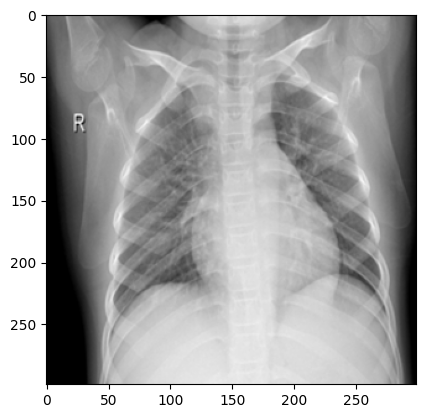

In [23]:

# <=10692 Covid

# >=10692 but < 16704 = Lung_Opacity

# >=16704 but < 26896 = Normal

# >=26896 but < 30910 Viral Pneumonia

#>= 30910 Tuberculosis
#Showing a sample X ray image


import matplotlib.pyplot as plt
import cv2

# Assuming df['filename'][36] contains the filename of the image
image_path = 'drive/MyDrive/New_COVID-TB-Dataset/Normal/' + df['filename'][16705]

# Read the image in RGB format
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.show()


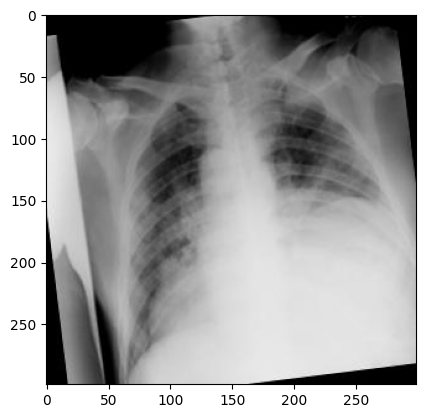

In [24]:

# <=10692 Covid

# >=10692 but < 16704 = Lung_Opacity

# >=16704 but < 26896 = Normal

# >=26896 but < 30910 Viral Pneumonia

#>= 30910 Tuberculosis
#Showing a sample X ray image


import matplotlib.pyplot as plt
import cv2

# Assuming df['filename'][36] contains the filename of the image
image_path = 'drive/MyDrive/New_COVID-TB-Dataset/COVID/' + df['filename'][123]

# Read the image in RGB format
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.show()


In [25]:
# Resizing images and storing in X numpy array
import numpy as np
import cv2

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (80,80))  # This tuple represents the final image size desired

X = np.ndarray((32992,80,80,3)) # 4200 images, 80x80 pixels, 3 channels (RGB)



In [26]:
i=0
for image_file in df1['filename']:
    X[i,:] = resize_img('drive/MyDrive/New_COVID-TB-Dataset/COVID/'+image_file)
    i+=1

In [27]:
for image_file in df2['filename']:
    X[i,:] = resize_img('drive/MyDrive/New_COVID-TB-Dataset/Lung_Opacity/'+image_file)
    i+=1

In [28]:
for image_file in df3['filename']:
    X[i,:] = resize_img('drive/MyDrive/New_COVID-TB-Dataset/Normal/'+image_file)
    i+=1

In [29]:
for image_file in df4['filename']:
    X[i,:] = resize_img('drive/MyDrive/New_COVID-TB-Dataset/Viral Pneumonia/'+image_file)
    i+=1

In [ ]:
for image_file in df5['filename']:
    X[i,:] = resize_img('drive/MyDrive/New_COVID-TB-Dataset/Tuberculosis/'+image_file)
    i+=1

In [32]:
print(i)

32992


In [ ]:
x

In [33]:
X.shape

(32992, 80, 80, 3)

In [38]:
X[32990]

array([[[ 45.,  40.,  42.],
        [ 42.,  40.,  42.],
        [ 40.,  41.,  41.],
        ...,
        [ 76.,  83.,  80.],
        [ 78.,  84.,  83.],
        [ 41.,  41.,  41.]],

       [[ 80., 107., 104.],
        [112., 132., 131.],
        [139., 151., 147.],
        ...,
        [ 78.,  86.,  83.],
        [ 80.,  86.,  85.],
        [ 42.,  42.,  42.]],

       [[151., 166., 153.],
        [160., 168., 156.],
        [171., 177., 164.],
        ...,
        [ 80.,  87.,  84.],
        [ 78.,  86.,  85.],
        [ 41.,  41.,  41.]],

       ...,

       [[ 41.,  41.,  41.],
        [251., 251., 251.],
        [255., 255., 255.],
        ...,
        [ 40.,  59.,  65.],
        [ 41.,  49.,  54.],
        [ 44.,  49.,  52.]],

       [[ 41.,  41.,  41.],
        [254., 254., 254.],
        [255., 255., 255.],
        ...,
        [ 49.,  58.,  61.],
        [ 51.,  56.,  57.],
        [ 54.,  59.,  60.]],

       [[ 41.,  41.,  41.],
        [252., 252., 252.],
        [254., 2

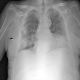

In [39]:
from google.colab.patches import cv2_imshow
cv2_imshow(X[2])

In [40]:
from sklearn.model_selection import train_test_split

# Training, validation, and testing datasets sizes
#train_size = 15000
#validation_size = 5000
#test_size = 5000

# Splitting the data into training and remaining sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, df['category'], test_size=0.3, random_state=42, stratify=df['category'])

# Splitting the remaining into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42, stratify=y_remaining)

# Checking the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (23094, 80, 80, 3)
y_train shape: (23094,)
X_validation shape: (4949, 80, 80, 3)
y_validation shape: (4949,)
X_test shape: (4949, 80, 80, 3)
y_test shape: (4949,)


In [41]:
type(y_test)

pandas.core.series.Series

In [42]:
value_counts = y_test.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    1604
2    1529
1     902
3     602
4     312
Name: category, dtype: int64
Count of 0: 1604
Count of 1: 902


In [43]:
value_counts = y_validation.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    1604
2    1529
1     902
3     602
4     312
Name: category, dtype: int64
Count of 0: 1604
Count of 1: 902


In [44]:
value_counts = y_train.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    7484
2    7134
1    4208
3    2810
4    1458
Name: category, dtype: int64
Count of 0: 7484
Count of 1: 4208


XceptionNet

In [45]:
X_train.shape

(23094, 80, 80, 3)

In [46]:
# Resize after preprocessing to keep full dataset
X_train_X = tf.image.resize(X_train, [71,71])
X_valid_X = tf.image.resize(X_validation, [71,71])
X_test_X = tf.image.resize(X_test, [71,71])

In [47]:
X_train_X.shape

TensorShape([23094, 71, 71, 3])

In [48]:
# Try Xception
# Data augmentation, global pooling and dropout
base_model_2X = keras.applications.Xception(weights="imagenet",
                                              include_top=False,
                                         input_shape=(71,71,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model_2X.output)
dropout = keras.layers.Dropout(0.05)(global_avg)
output = keras.layers.Dense(5, activation="softmax")(dropout)
model_2X = keras.models.Model(inputs=base_model_2X.input, outputs=output)

83683744/83683744 [==============================] - 4s 0us/step


In [49]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, brightness_range=[0.8, 1.2])

In [50]:
# Freeze transferred layers and train
%%time
for layer in base_model_2X.layers:
    layer.trainable = False

model_2X.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-3),
                metrics=["accuracy"])

history_2X = model_2X.fit(datagen.flow(X_train_X, y_train, batch_size=32),
                    epochs=50, validation_data=(X_valid_X, y_validation),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])


Epoch 1/50
722/722 [==============================] - 57s 63ms/step - loss: 2.4482 - accuracy: 0.5409 - val_loss: 1.1406 - val_accuracy: 0.6862
Epoch 2/50
722/722 [==============================] - 43s 60ms/step - loss: 1.6305 - accuracy: 0.6145 - val_loss: 1.0413 - val_accuracy: 0.6840
Epoch 3/50
722/722 [==============================] - 43s 60ms/step - loss: 1.3736 - accuracy: 0.6397 - val_loss: 1.1704 - val_accuracy: 0.6793
Epoch 4/50
722/722 [==============================] - 43s 60ms/step - loss: 1.2647 - accuracy: 0.6540 - val_loss: 1.0170 - val_accuracy: 0.7236
Epoch 5/50
722/722 [==============================] - 43s 60ms/step - loss: 1.2201 - accuracy: 0.6585 - val_loss: 1.4650 - val_accuracy: 0.6159
Epoch 6/50
722/722 [==============================] - 43s 60ms/step - loss: 1.2189 - accuracy: 0.6569 - val_loss: 0.9253 - val_accuracy: 0.7092
Epoch 7/50
722/722 [==============================] - 43s 60ms/step - loss: 1.1627 - accuracy: 0.6625 - val_loss: 0.9900 - val_accuracy:

In [51]:
# Unfreeze layers and train
%%time
for layer in base_model_2X.layers:
    layer.trainable = True

model_2X.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4), # need smaller lr
                metrics=["accuracy"])

n_epochs = 100
batch_size = 32
history_2X = model_2X.fit(datagen.flow(X_train_X, y_train, batch_size=batch_size),
                    epochs=n_epochs,
                    validation_data=(X_valid_X, y_validation),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/100
722/722 [==============================] - 111s 95ms/step - loss: 0.4821 - accuracy: 0.8183 - val_loss: 0.2983 - val_accuracy: 0.9157
Epoch 2/100
722/722 [==============================] - 68s 94ms/step - loss: 0.2544 - accuracy: 0.9070 - val_loss: 0.4187 - val_accuracy: 0.9287
Epoch 3/100
722/722 [==============================] - 69s 95ms/step - loss: 0.2061 - accuracy: 0.9263 - val_loss: 0.3421 - val_accuracy: 0.9368
Epoch 4/100
722/722 [==============================] - 69s 96ms/step - loss: 0.1708 - accuracy: 0.9405 - val_loss: 0.2114 - val_accuracy: 0.9313
Epoch 5/100
722/722 [==============================] - 69s 95ms/step - loss: 0.1566 - accuracy: 0.9440 - val_loss: 0.2407 - val_accuracy: 0.9224
Epoch 6/100
722/722 [==============================] - 69s 95ms/step - loss: 0.1376 - accuracy: 0.9516 - val_loss: 0.1710 - val_accuracy: 0.9450
Epoch 7/100
722/722 [==============================] - 69s 96ms/step - loss: 0.1205 - accuracy: 0.9566 - val_loss: 0.1843 - val_a

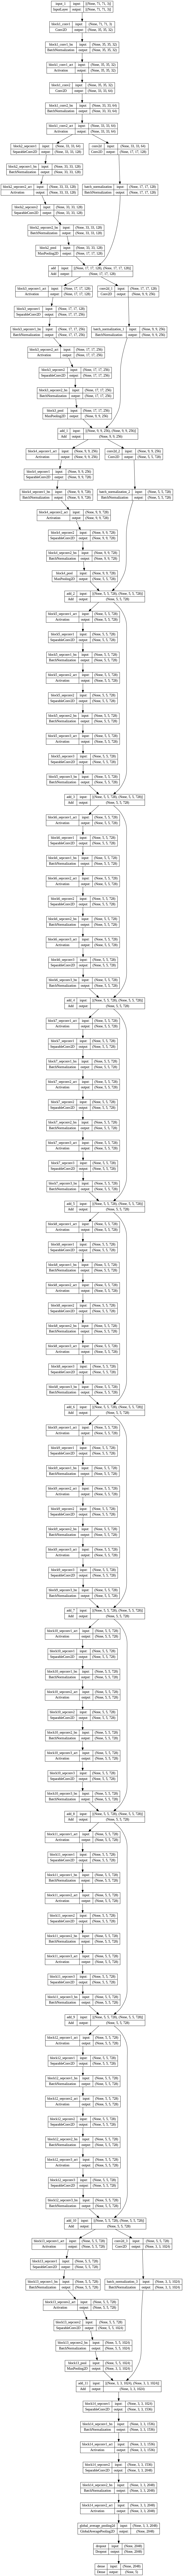

In [52]:
keras.utils.plot_model(model_2X, show_shapes=True)

In [53]:
# Printing validation set accuracy
val_loss, val_accuracy = model_2X.evaluate(X_validation, y_validation)
print(f"Validation Accuracy: {val_accuracy:.4f}")

155/155 [==============================] - 5s 24ms/step - loss: 0.3792 - accuracy: 0.8755
Validation Accuracy: 0.8755


In [54]:
# Printing test set accuracy
model_2X.evaluate(X_test, y_test)

155/155 [==============================] - 4s 23ms/step - loss: 0.3699 - accuracy: 0.8771


[0.3698543608188629, 0.8771468997001648]

In [55]:
# Save accuracy and validation accuracy for each epoch
accuracy_values_2X = history_2X.history["accuracy"]
val_accuracy_values_2X = history_2X.history["val_accuracy"]

In [56]:
from skimage.transform import resize

# Assuming X_test contains images
resized_X_test = np.array([resize(image, (71, 71, 3)) for image in X_test])

# Predict on the resized test set
y_pred = model_2X.predict(resized_X_test)


155/155 [==============================] - 4s 21ms/step


In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
# y_pred = model_2X.predict(X_test)

# Convert one-hot encoded predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the labels in y_test to numpy array
y_test_np = np.array(y_test)

# Display classification report
report = classification_report(y_test_np, y_pred_classes, target_names=['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia', 'Tuberculosis'])
print("Classification Report:\n", report)

# Display confusion matrix
cm = confusion_matrix(y_test_np, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Calculate accuracy for each class
class_labels = ['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia','Tuberculosis']
accuracy_per_class = {}

for i, label in enumerate(class_labels):
    class_index = i
    correct_predictions = np.sum((y_pred_classes == class_index) & (y_test_np == class_index))
    total_samples = np.sum(y_test_np == class_index)
    accuracy = correct_predictions / total_samples
    accuracy_per_class[label] = accuracy
    print(f"Accuracy for {label}: {accuracy:.4f}")

# Display overall accuracy
overall_accuracy = accuracy_score(y_test_np, y_pred_classes)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

Classification Report:
                  precision    recall  f1-score   support

          COVID       0.97      0.99      0.98      1604
   Lung_Opacity       0.93      0.86      0.90       902
         Normal       0.92      0.95      0.93      1529
Viral_Pneumonia       1.00      0.97      0.98       602
   Tuberculosis       1.00      0.99      0.99       312

       accuracy                           0.95      4949
      macro avg       0.96      0.95      0.96      4949
   weighted avg       0.95      0.95      0.95      4949

Confusion Matrix:
 [[1581   16    7    0    0]
 [  11  779  112    0    0]
 [  28   43 1457    1    0]
 [   6    0   12  584    0]
 [   3    0    1    0  308]]
Accuracy for COVID: 0.9857
Accuracy for Lung_Opacity: 0.8636
Accuracy for Normal: 0.9529
Accuracy for Viral_Pneumonia: 0.9701
Accuracy for Tuberculosis: 0.9872

Overall Accuracy: 0.9515


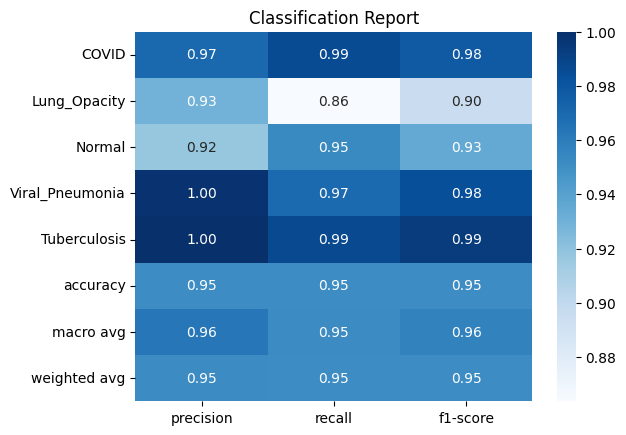

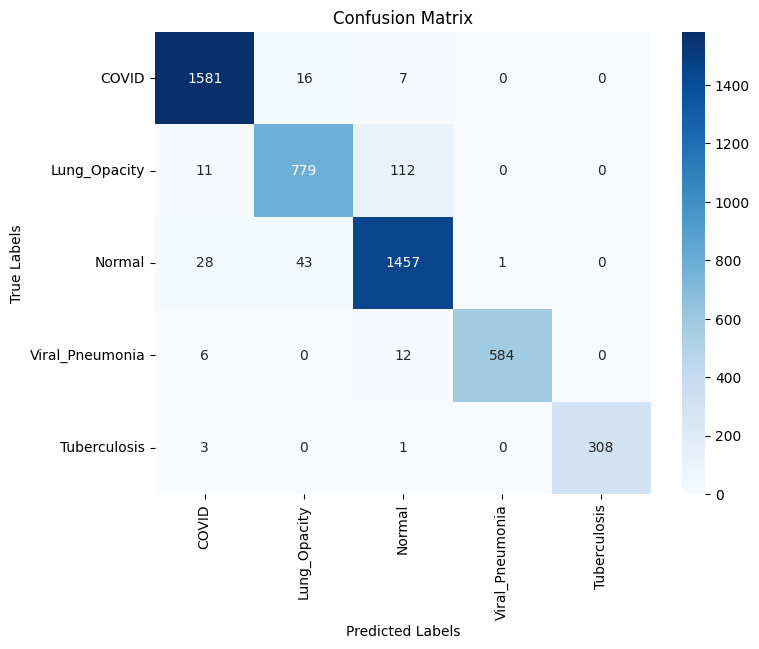

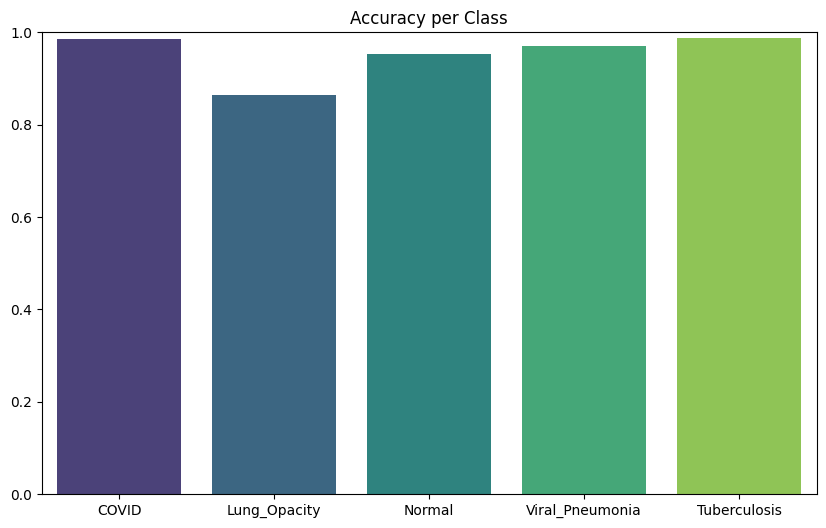


Overall Accuracy: 0.9515


In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
#y_pred = model_1X.predict(X_test)

# Convert one-hot encoded predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the labels in y_test to numpy array
y_test_np = np.array(y_test)

# Display classification report with a heatmap
report = classification_report(y_test_np, y_pred_classes, target_names=['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia', 'Tuberculosis'], output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report")
plt.show()

# Display confusion matrix with a heatmap
cm = confusion_matrix(y_test_np, y_pred_classes, labels=[0, 1, 2, 3, 4])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt="d", xticklabels=['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia','Tuberculosis'], yticklabels=['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia','Tuberculosis'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_per_class.keys()), y=list(accuracy_per_class.values()), palette="viridis")
plt.title("Accuracy per Class")
plt.ylim(0, 1)  # Set y-axis limit to represent accuracy as a percentage
plt.show()

# Display overall accuracy
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

In [61]:
9*8

72